In [1]:
import numpy as np
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline 
import seaborn as sns
import re

import itertools
from itertools import combinations
from itertools import (takewhile,repeat)

In [11]:
path_to_files='/home/sofyakrasik/BCR_CDR3_data/5RACE/for_specific_scatterplots/' 
pattern='ccp2' #pattern in filename

top_max=1000 #we are not interested in top higher than 1000

files=[f for f in os.listdir(path_to_files) if re.match('.*'+pattern+'.*'+'IGH.txt',f)]

data=pd.DataFrame()
files
for f in files:
    df=pd.read_csv(path_to_files+f,sep='\t')
    df=df[['cloneFraction','nSeqCDR3']]
    df['filename']=f
    df=df.head(top_max)
    data=data.append(df)
    


data['cloneFraction']=data.groupby(['nSeqCDR3','filename'])['cloneFraction'].transform('sum')
data=data.drop_duplicates(['nSeqCDR3','filename']).copy()
data
# #TO HAVE THE SAME SCALE FOR ALL PLOTS
# fmin=data['cloneFraction'].min()
# fmax=data['cloneFraction'].max()


,cloneFraction,nSeqCDR3,filename
0,0.042841,TGTGCGAGGCTTAGCAGTGGCTGGTTAAGGGGCGTCGGCTACTGG,col_ccp2_LN_bulk_2_1_pooled.clonotypes.IGH.txt
1,0.033964,TGTGTGACAACGGCTCGGGAACTCGCCTATTGG,col_ccp2_LN_bulk_2_1_pooled.clonotypes.IGH.txt
2,0.025473,TGTGCGCGACTTAAACTGGAACAAGGAACTTATGATGCTTTTGATA...,col_ccp2_LN_bulk_2_1_pooled.clonotypes.IGH.txt
3,0.021227,TGTGCTGGCCAGACTGTTCGTACCGCCTACGGTTTGGACGTCTGG,col_ccp2_LN_bulk_2_1_pooled.clonotypes.IGH.txt
4,0.017368,TGTGTCACACGGGAGTGGTTATCGGGGCCCTTTAAGATGTGG,col_ccp2_LN_bulk_2_1_pooled.clonotypes.IGH.txt
...,...,...,...
468,0.000775,TGTGCGAGGGGAAGGGACTACTGG,col_ccp2_LN_PCsort_2_1_pooled.clonotypes.IGH.txt
469,0.000775,TGTGCGAAAACCCTACTGTCGTGG,col_ccp2_LN_PCsort_2_1_pooled.clonotypes.IGH.txt
470,0.000775,TGCATCACCCGTTGGGGGTACTGG,col_ccp2_LN_PCsort_2_1_pooled.clonotypes.IGH.txt
471,0.000775,TGTGCGATGAATAATCATTGG,col_ccp2_LN_PCsort_2_1_pooled.clonotypes.IGH.txt


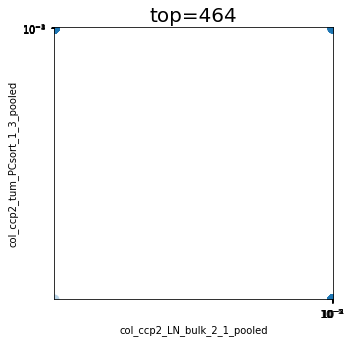

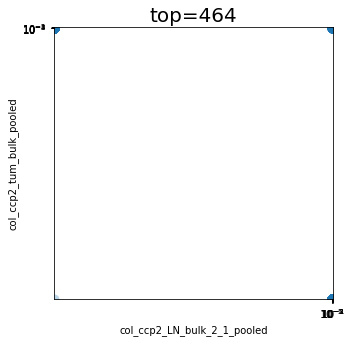

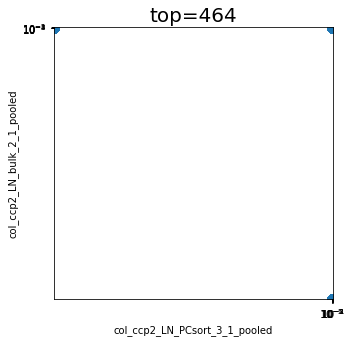

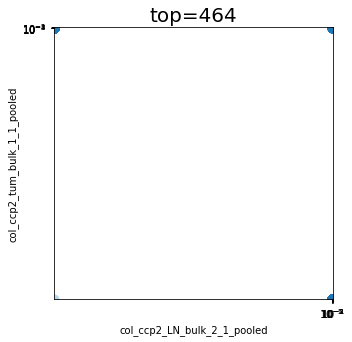

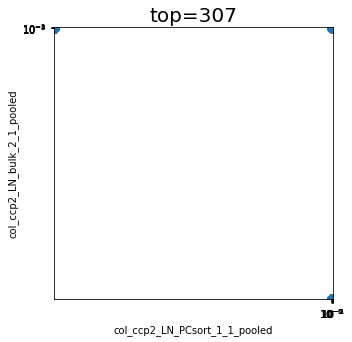

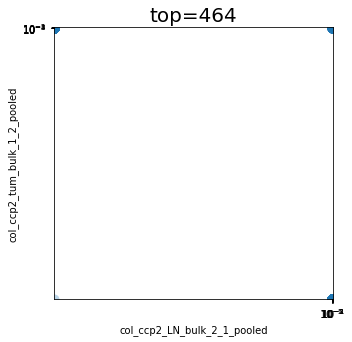

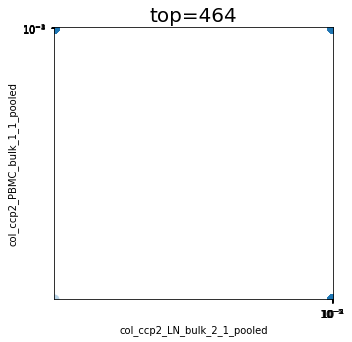

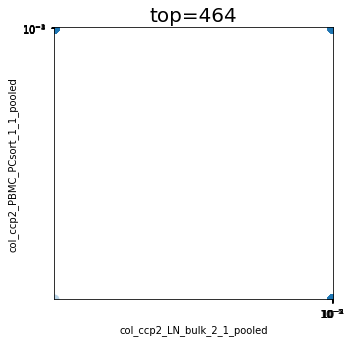

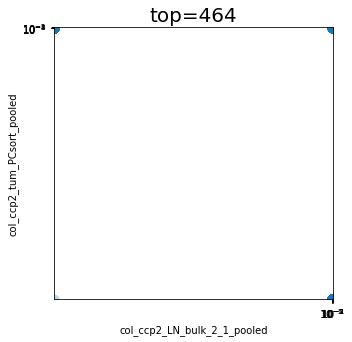

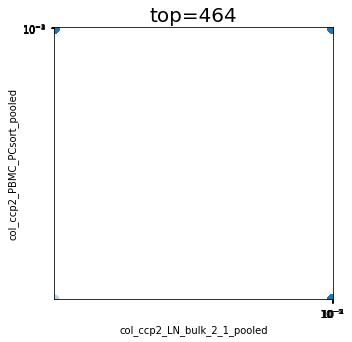

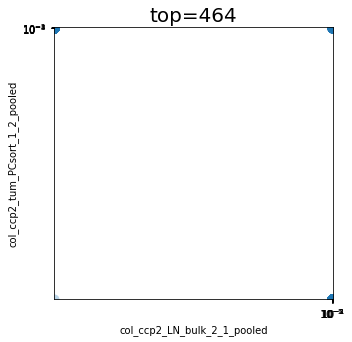

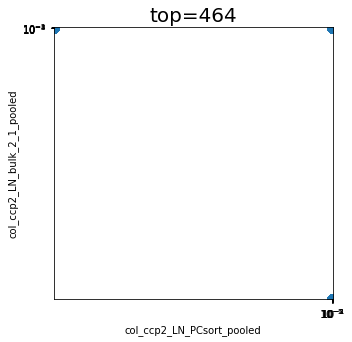

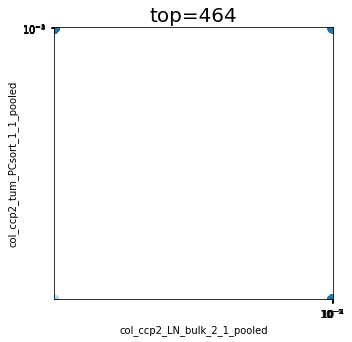

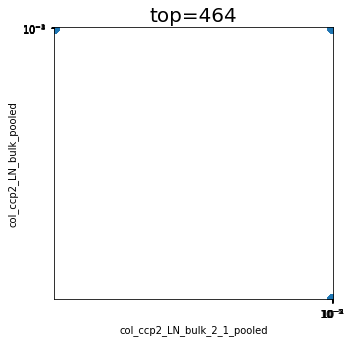

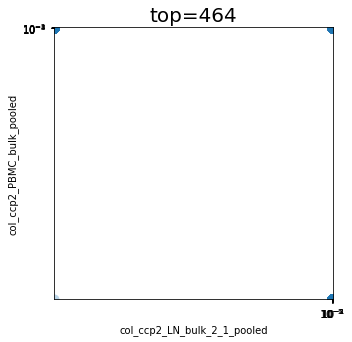

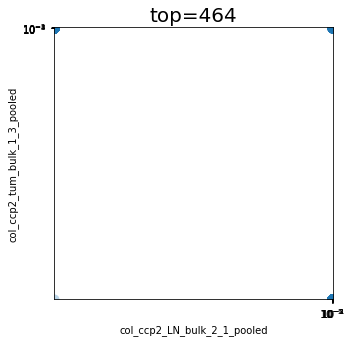

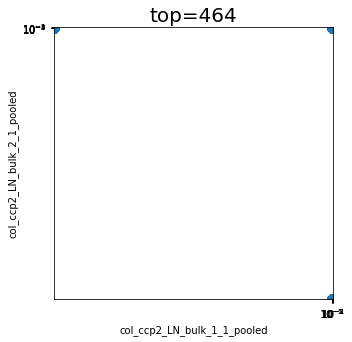

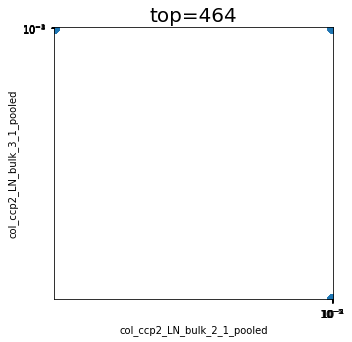

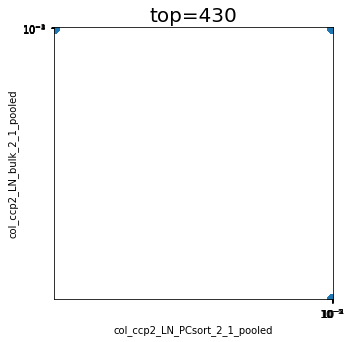

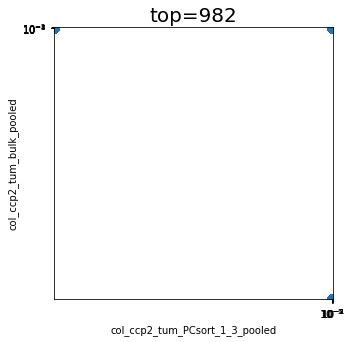

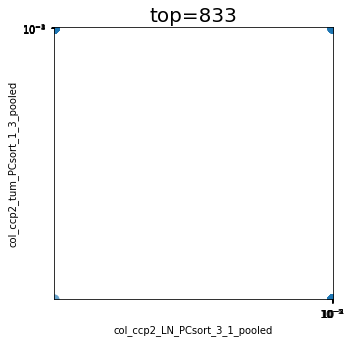

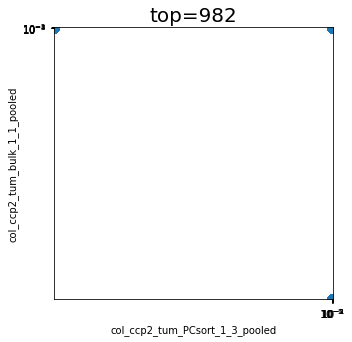

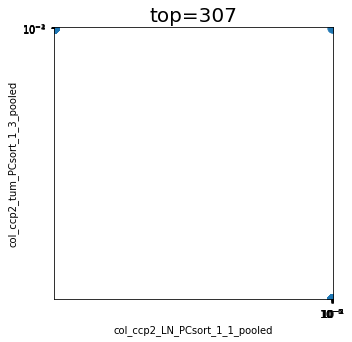

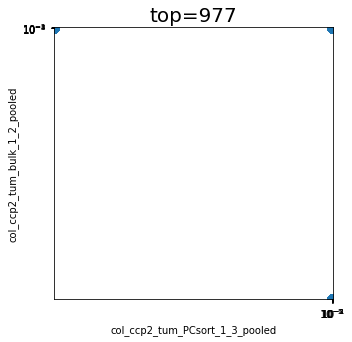

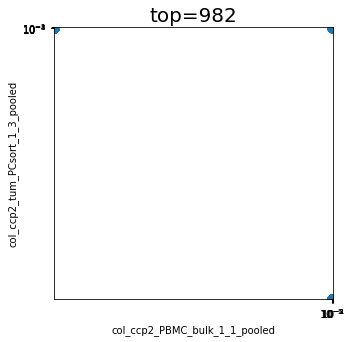

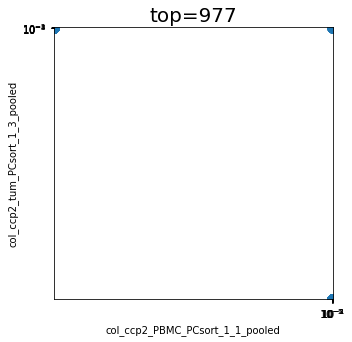

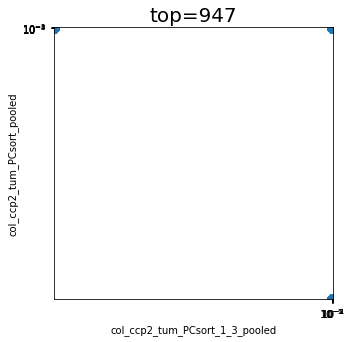

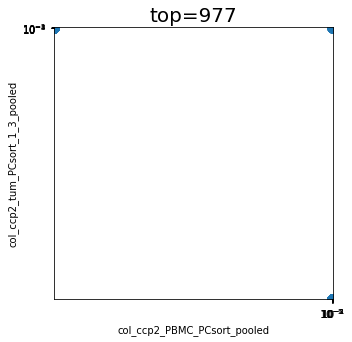

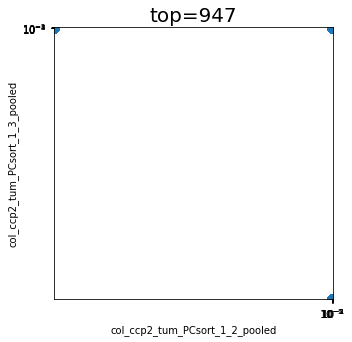

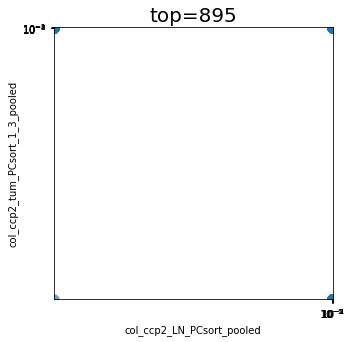

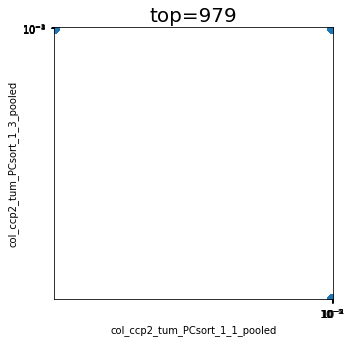

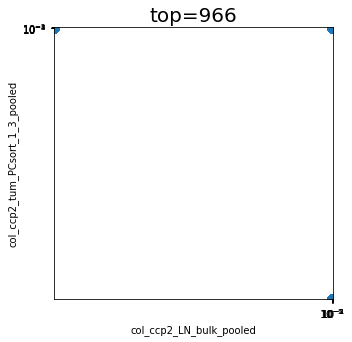

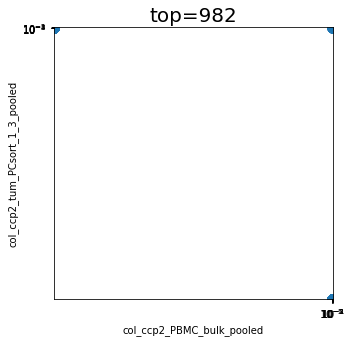

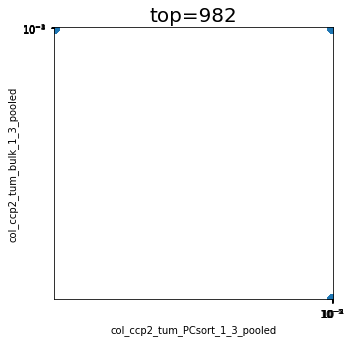

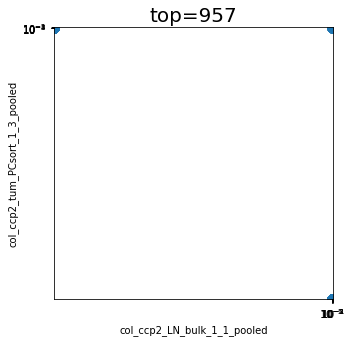

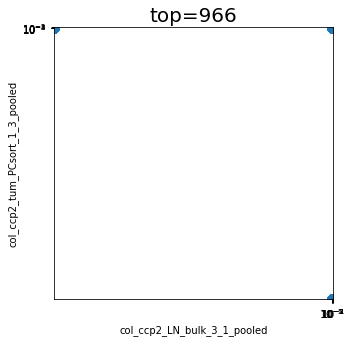

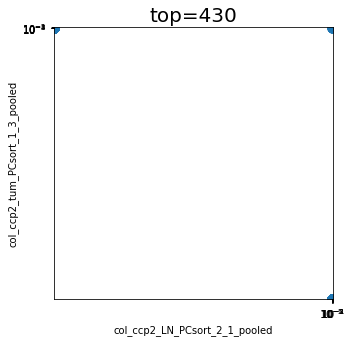

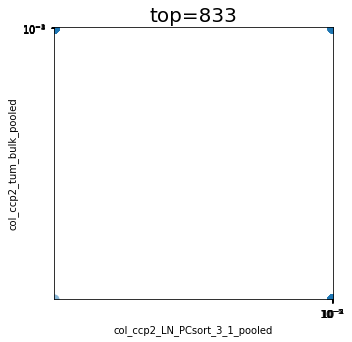

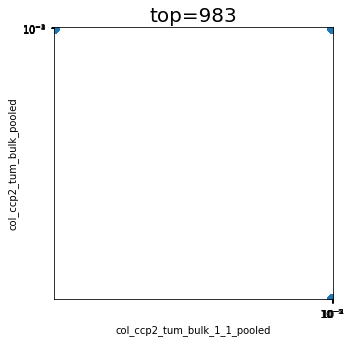

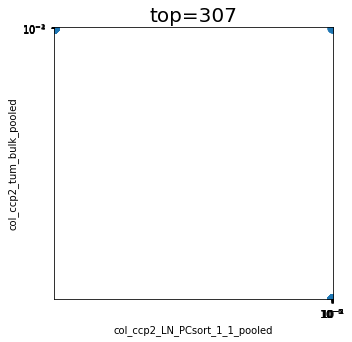

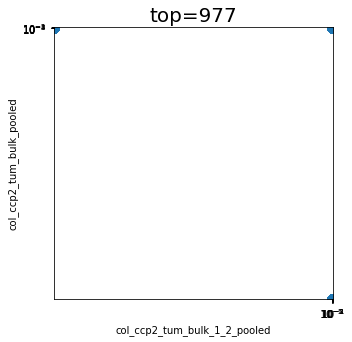

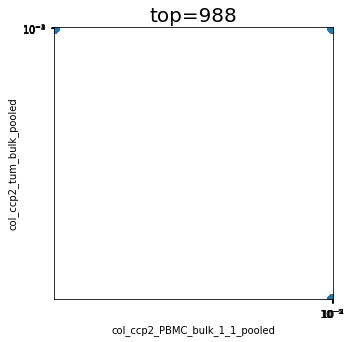

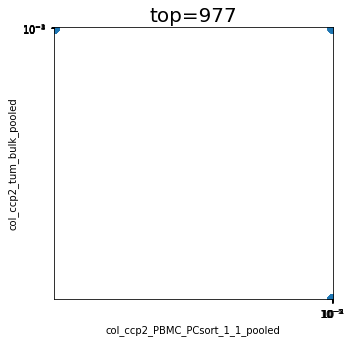

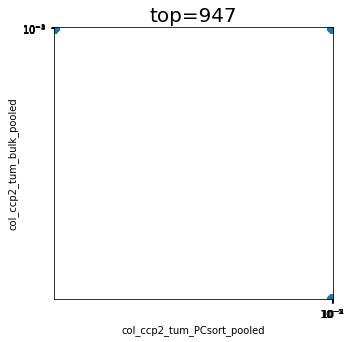

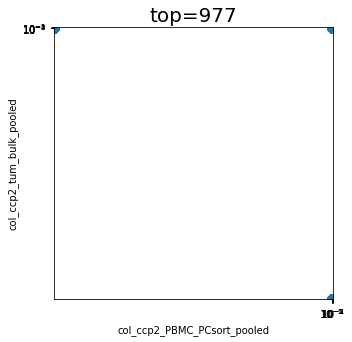

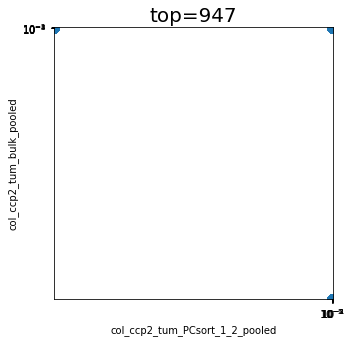

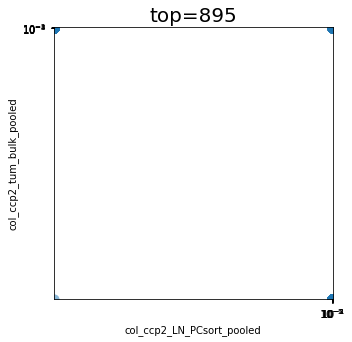

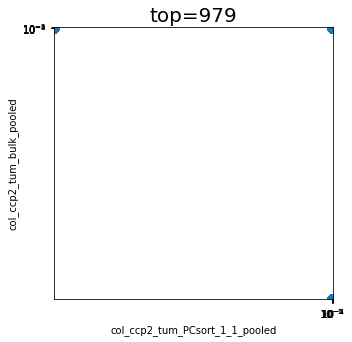

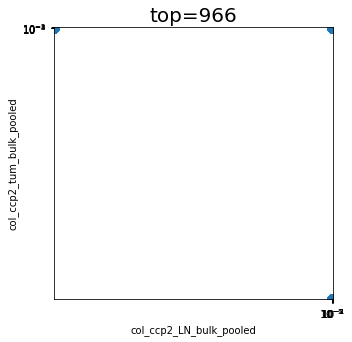

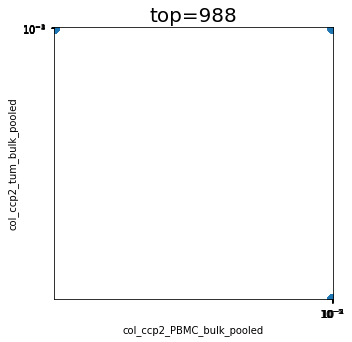

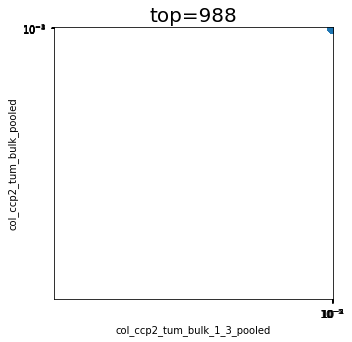

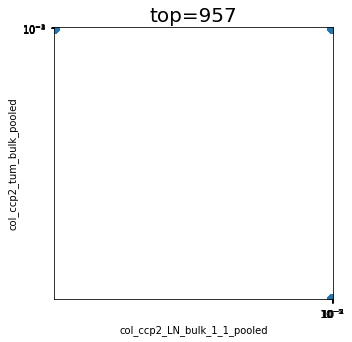

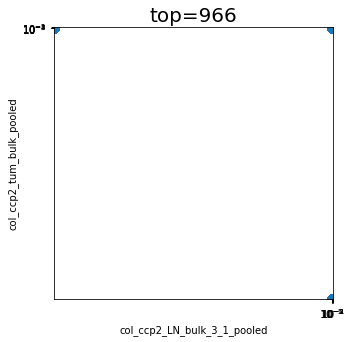

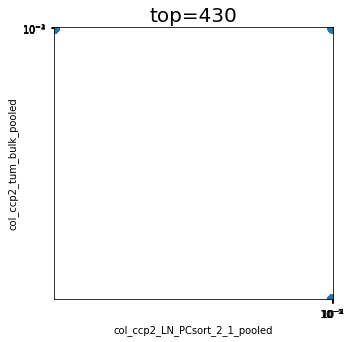

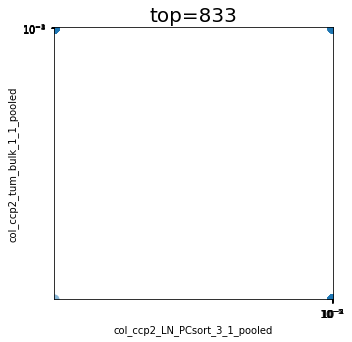

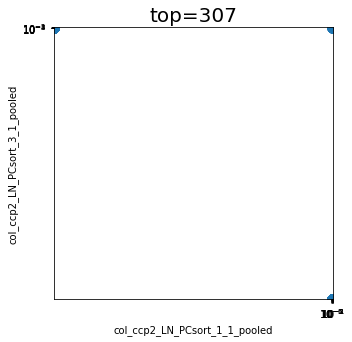

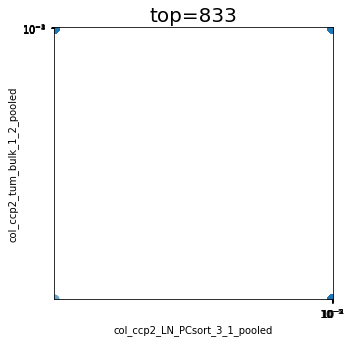

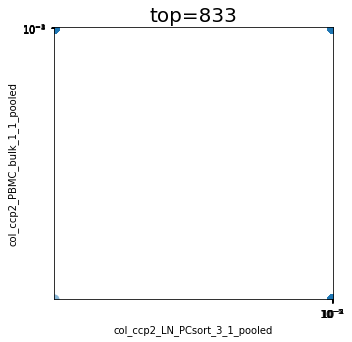

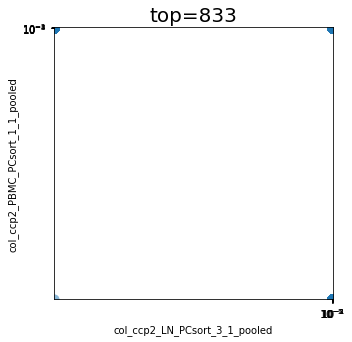

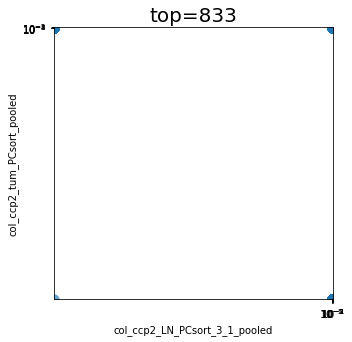

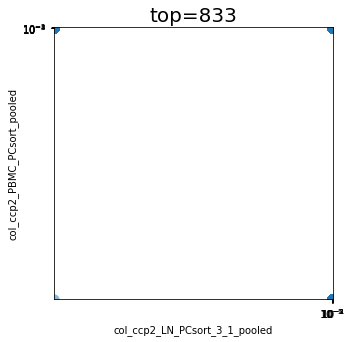

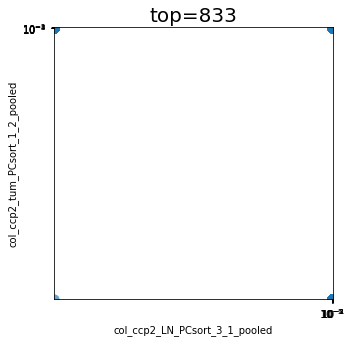

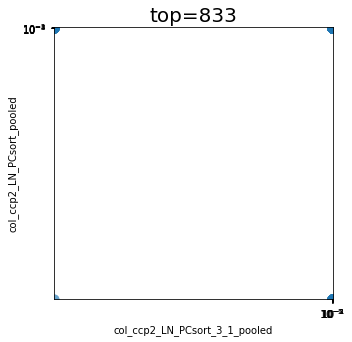

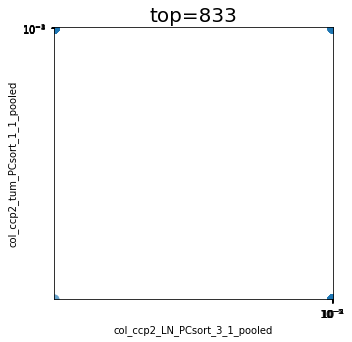

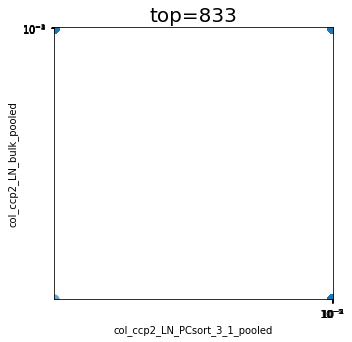

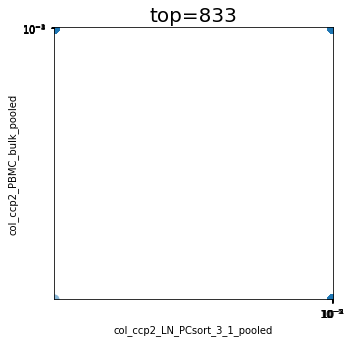

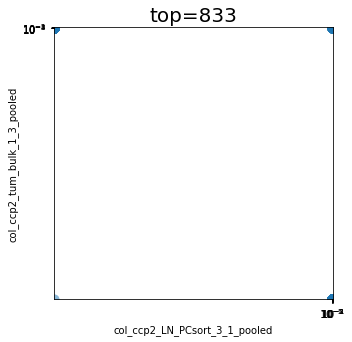

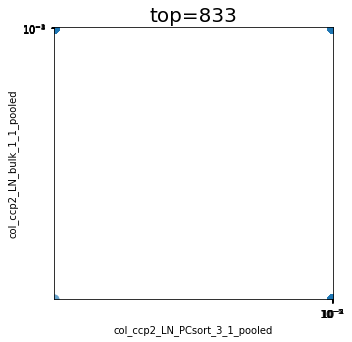

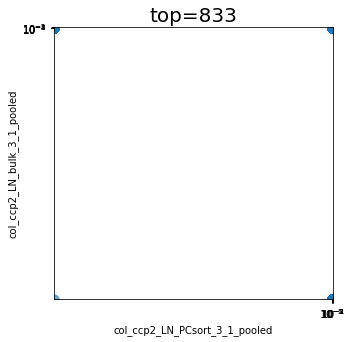

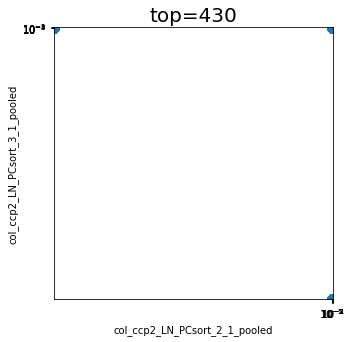

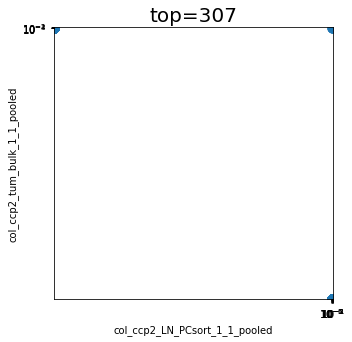

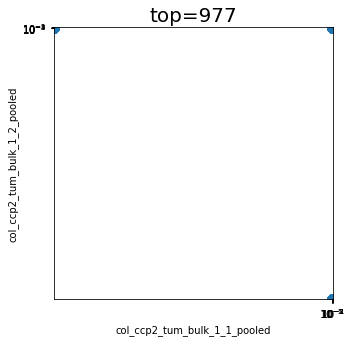

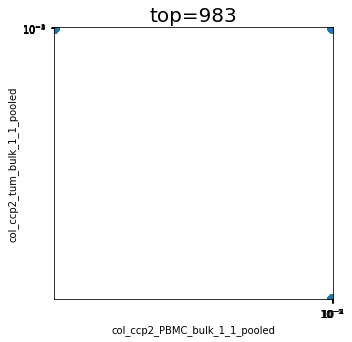

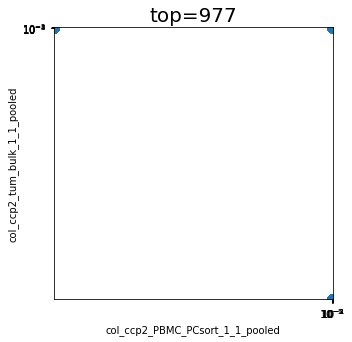

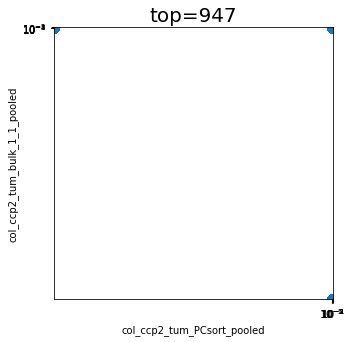

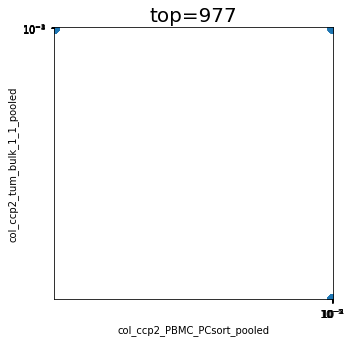

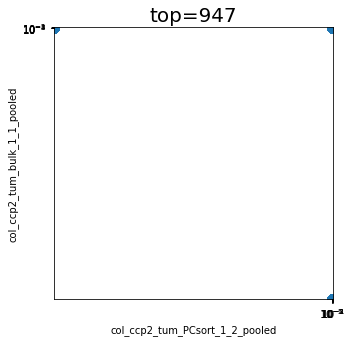

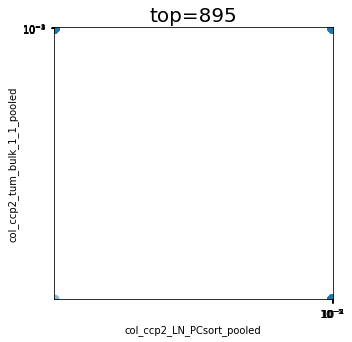

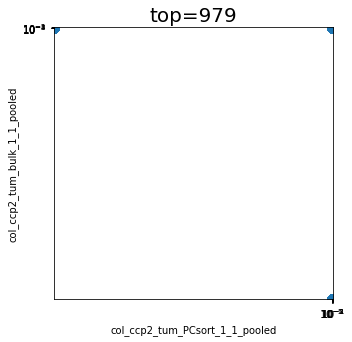

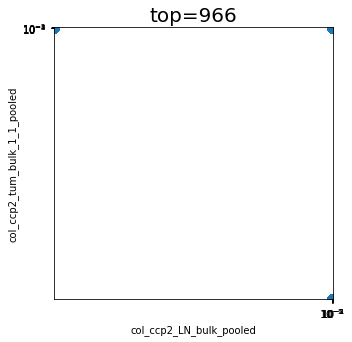

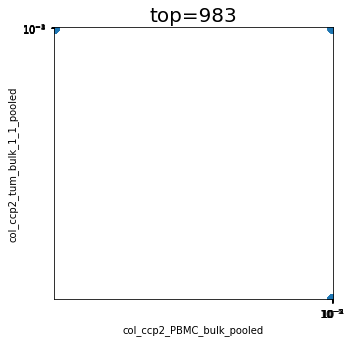

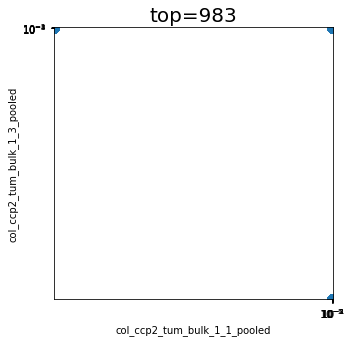

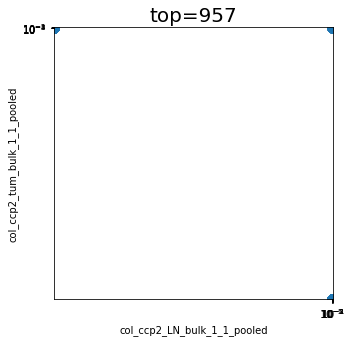

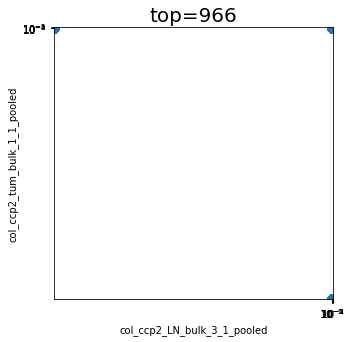

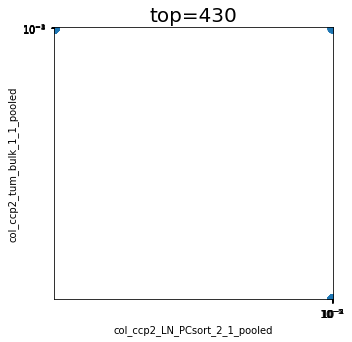

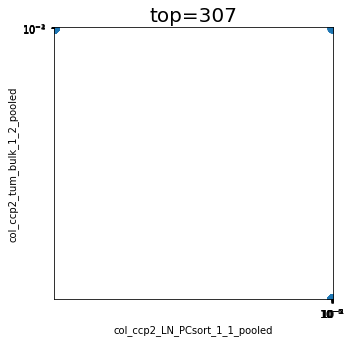

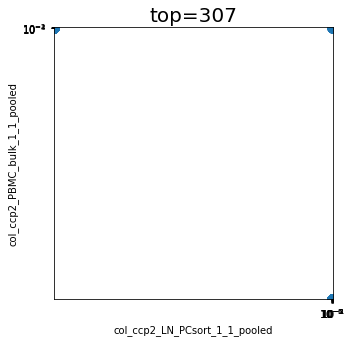

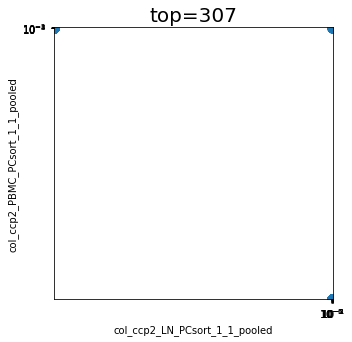

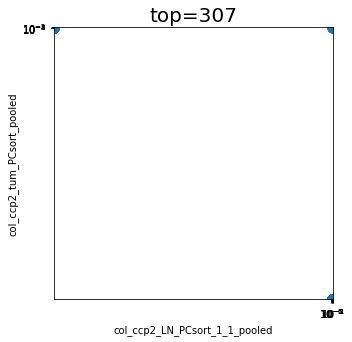

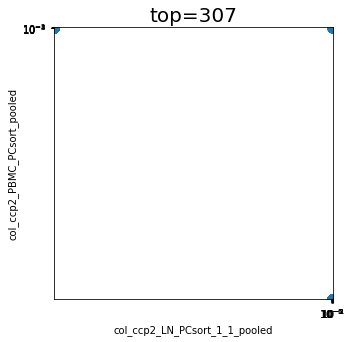

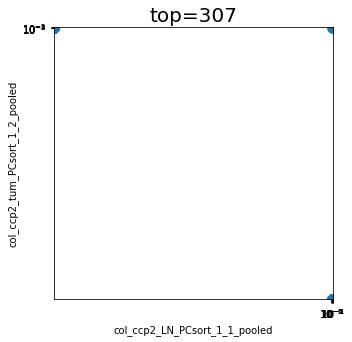

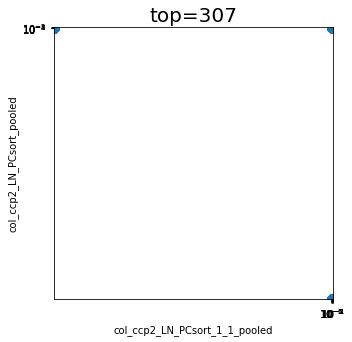

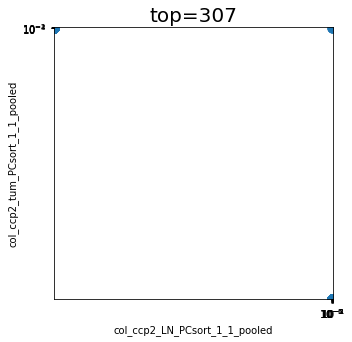

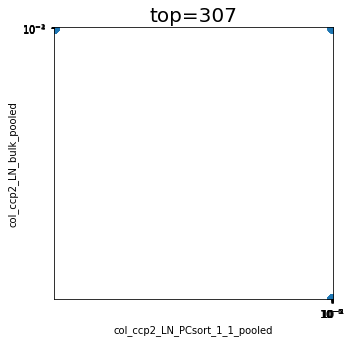

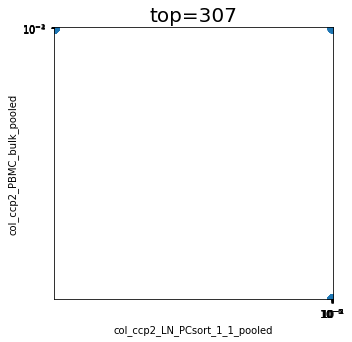

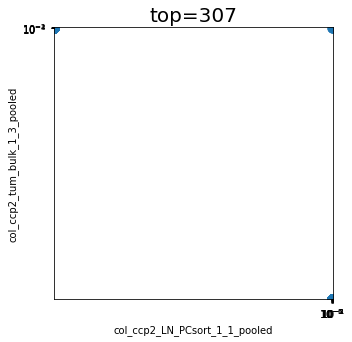

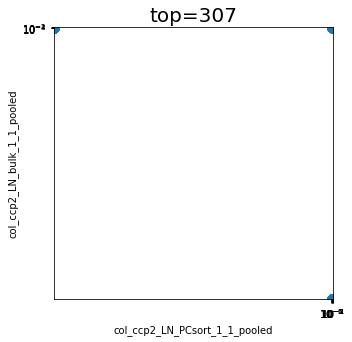

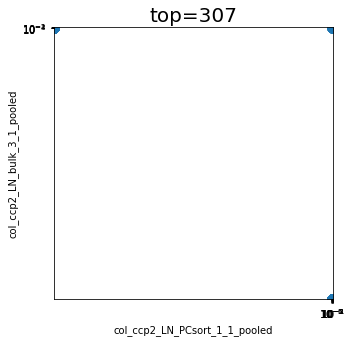

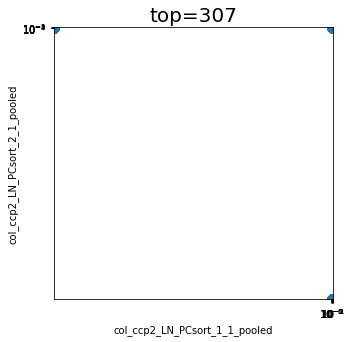

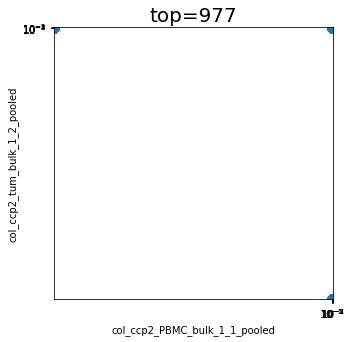

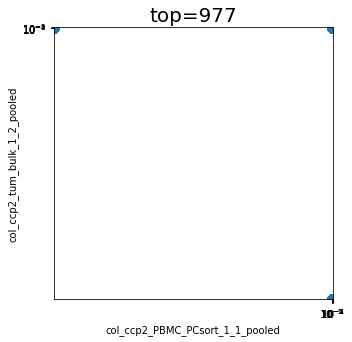

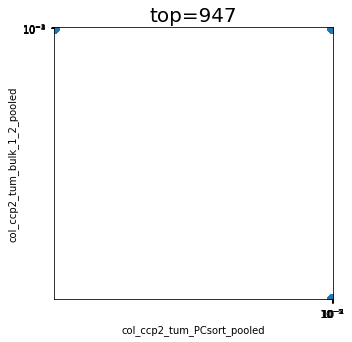

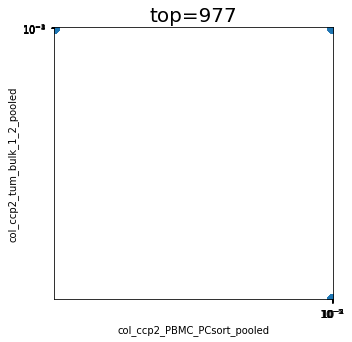

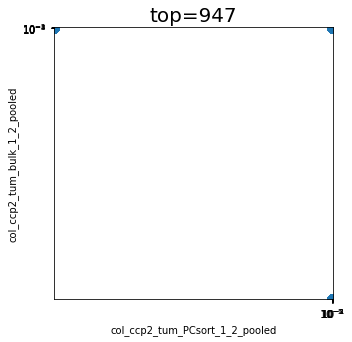

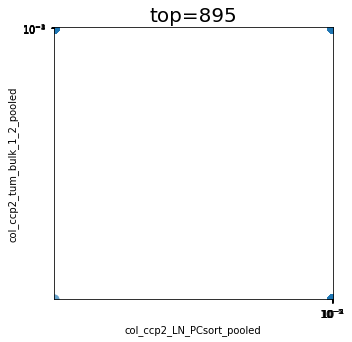

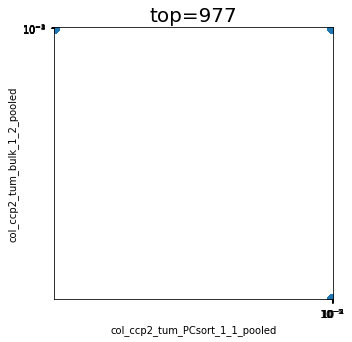

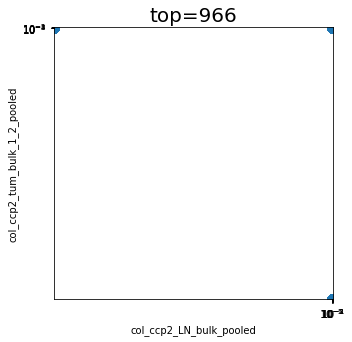

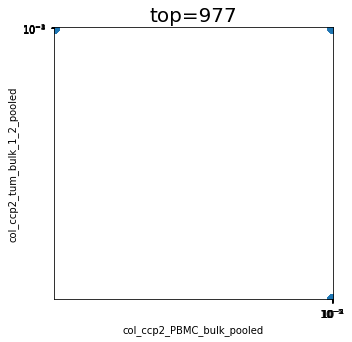

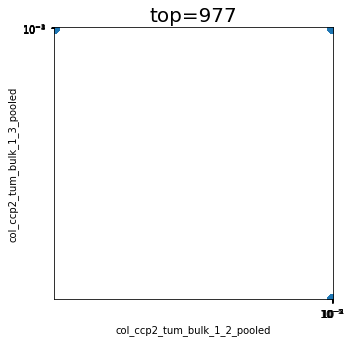

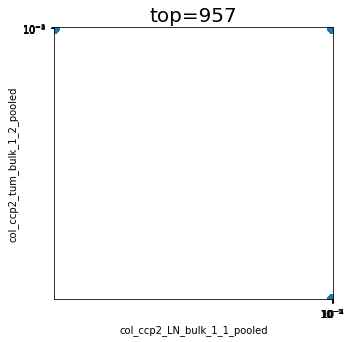

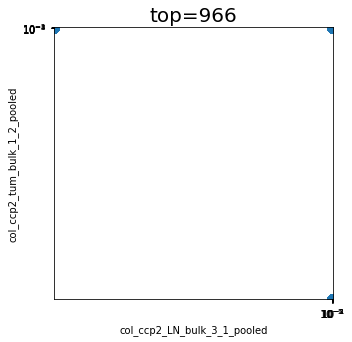

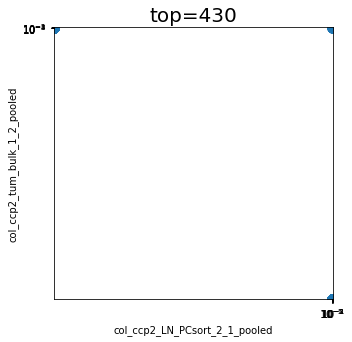

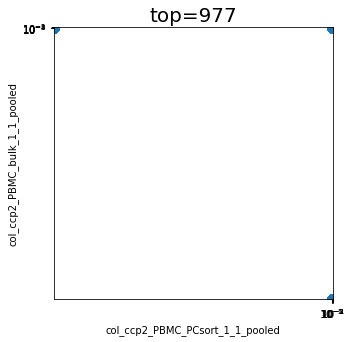

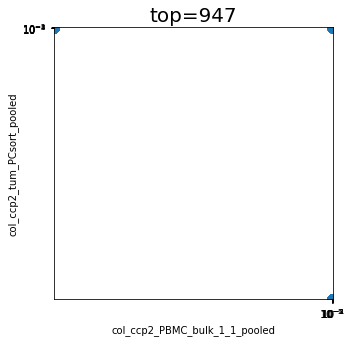

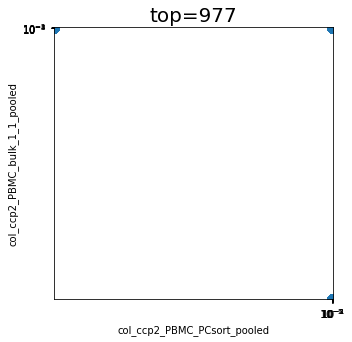

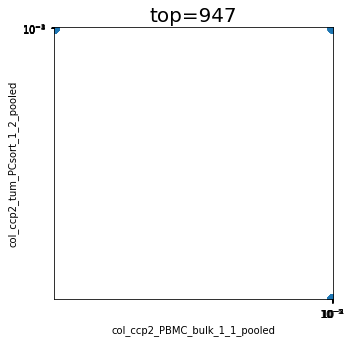

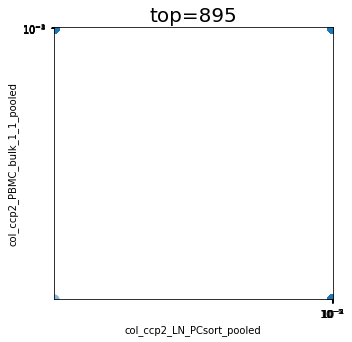

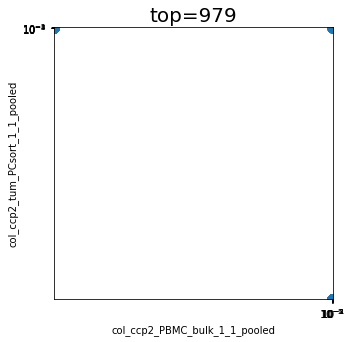

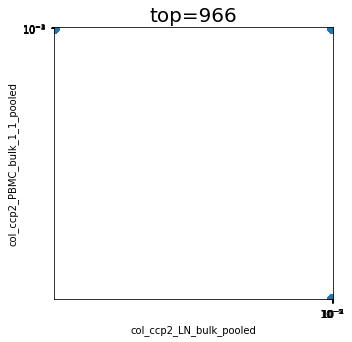

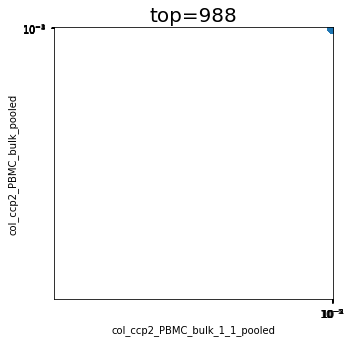

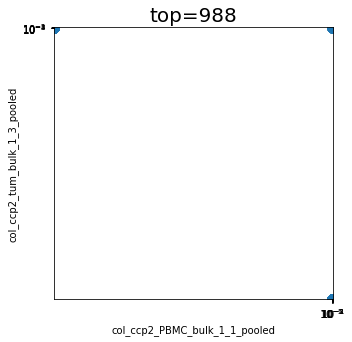

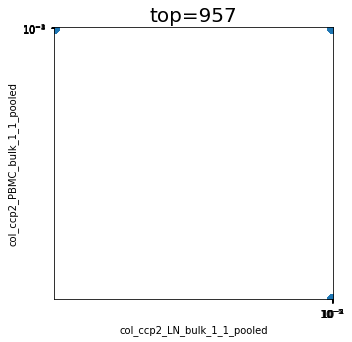

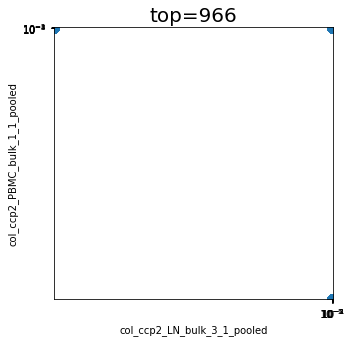

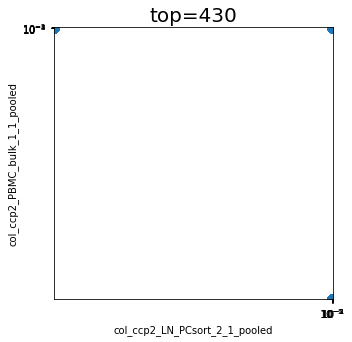

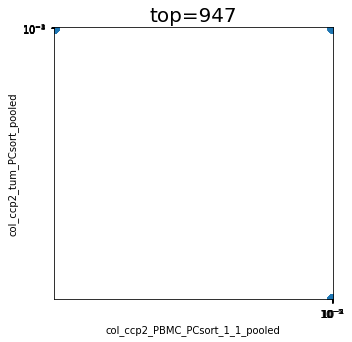

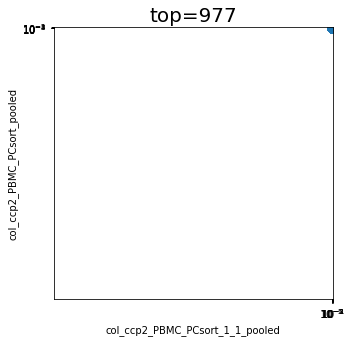

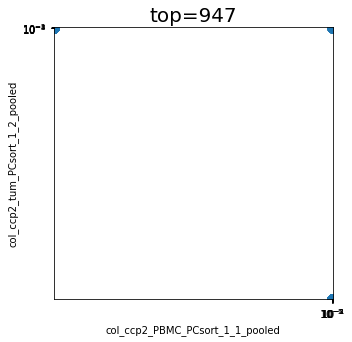

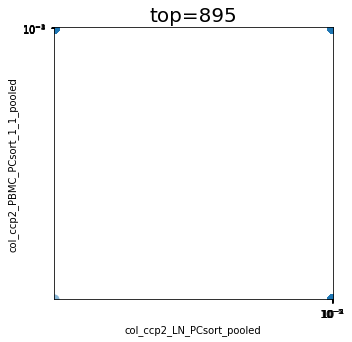

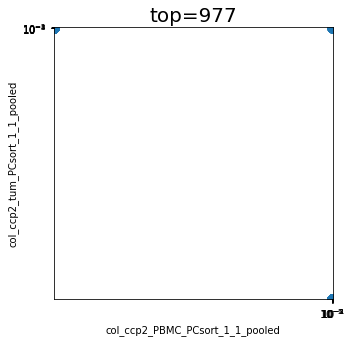

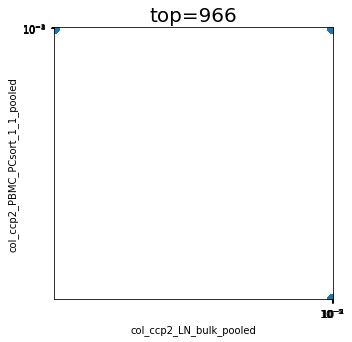

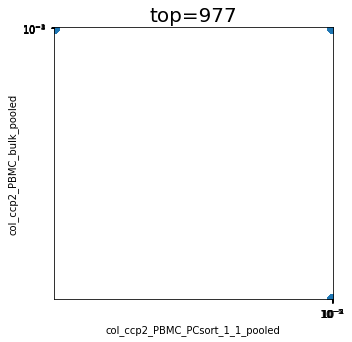

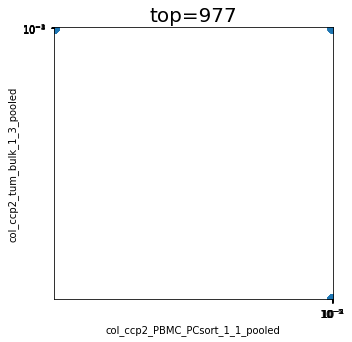

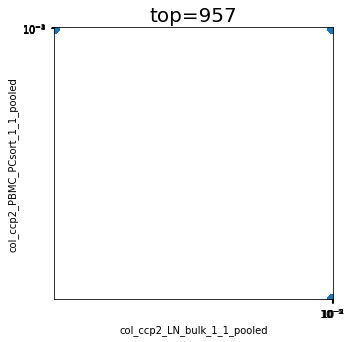

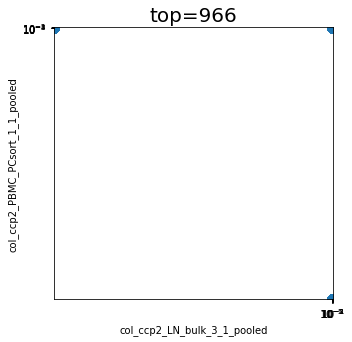

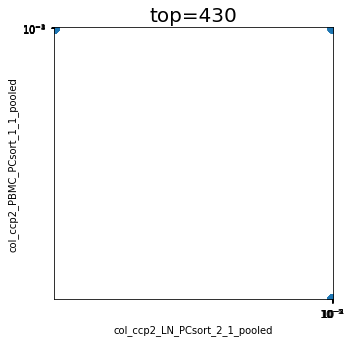

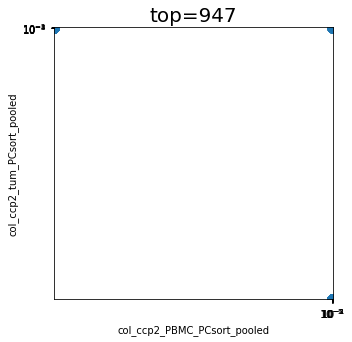

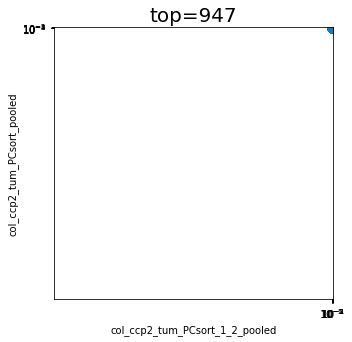

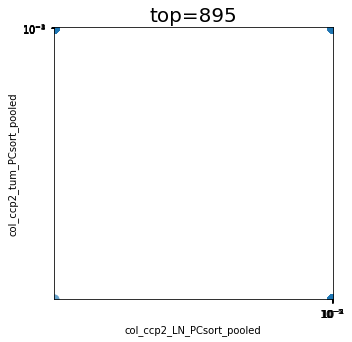

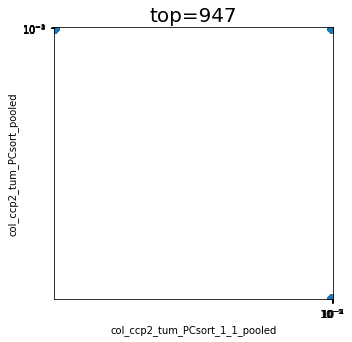

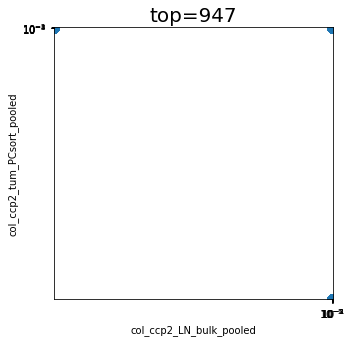

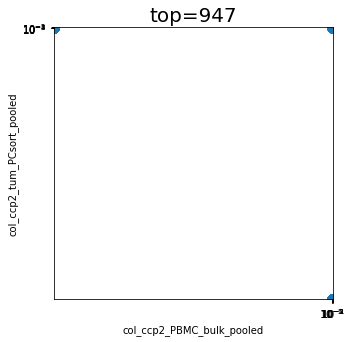

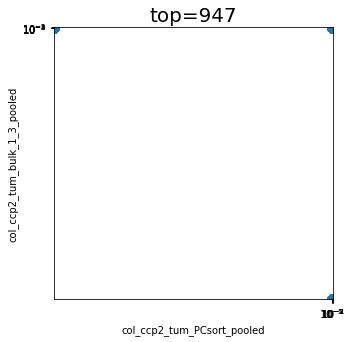

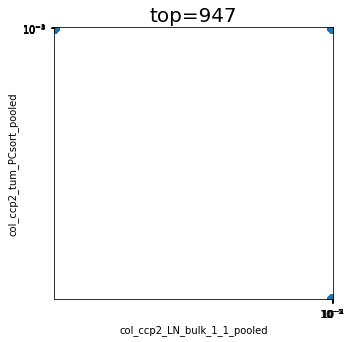

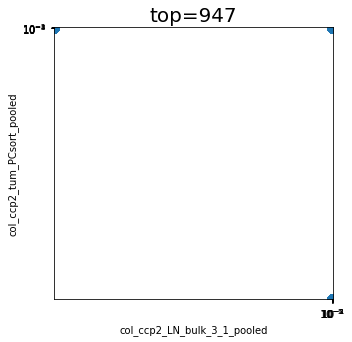

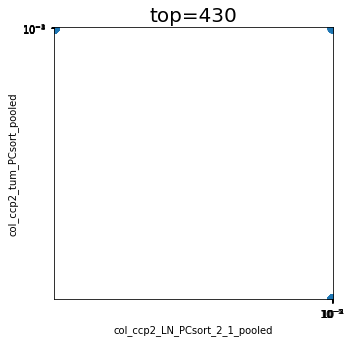

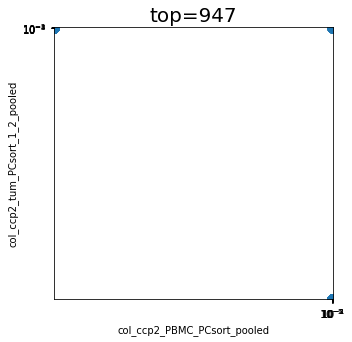

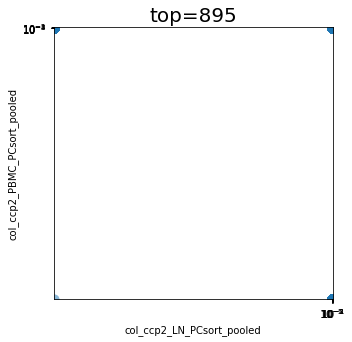

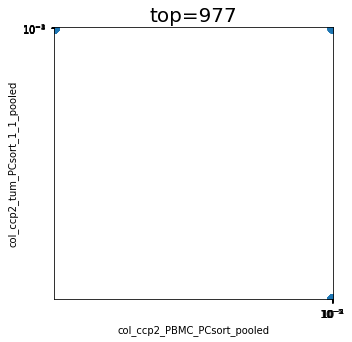

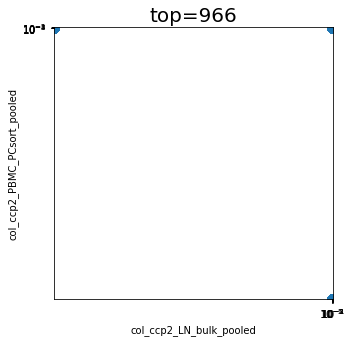

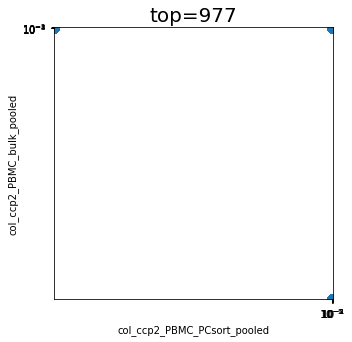

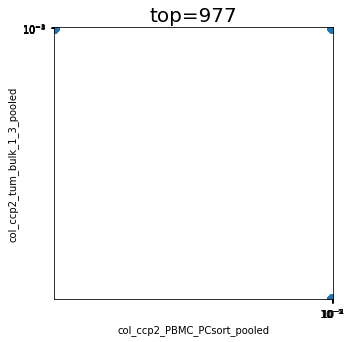

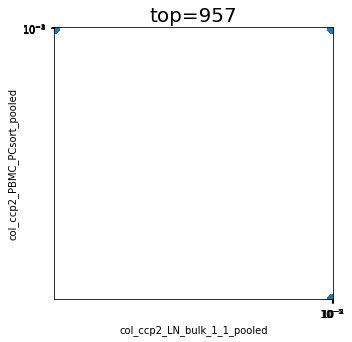

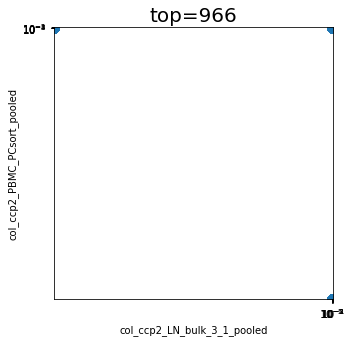

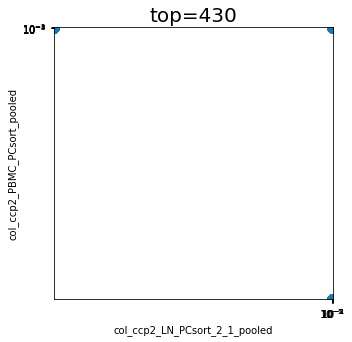

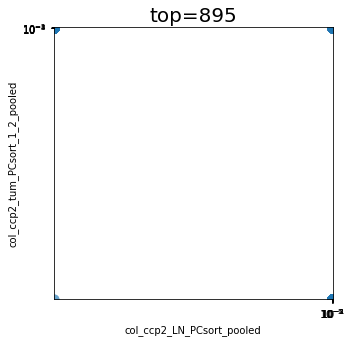

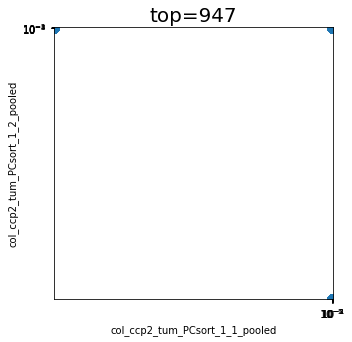

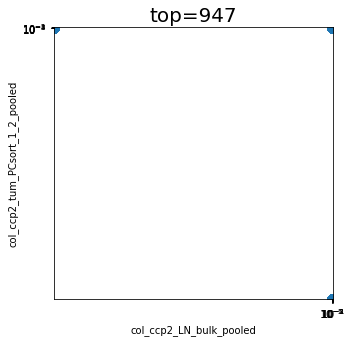

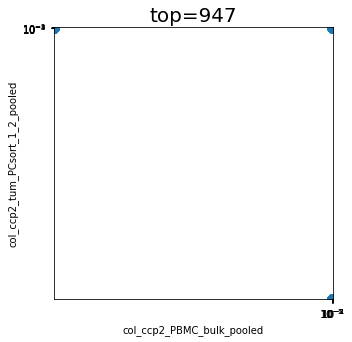

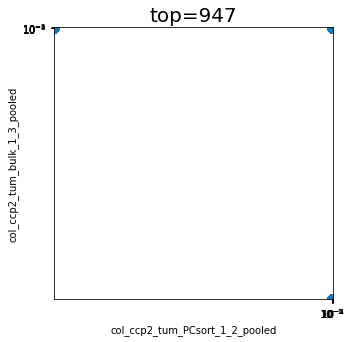

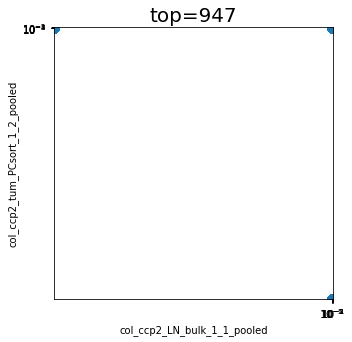

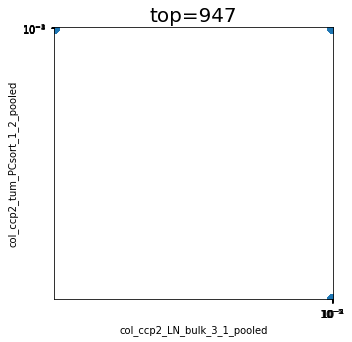

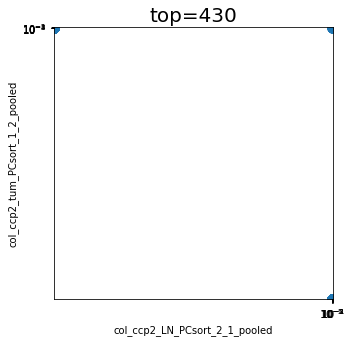

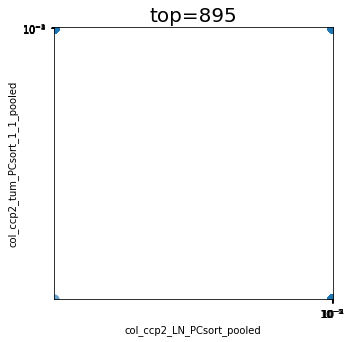

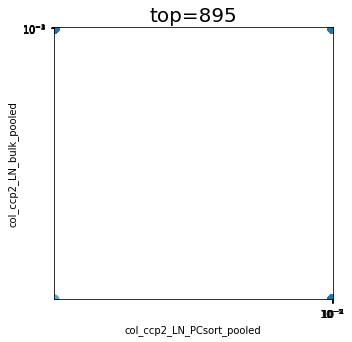

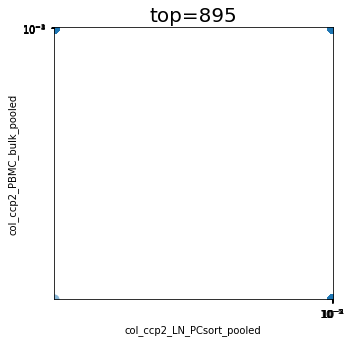

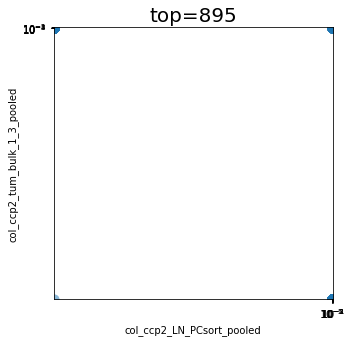

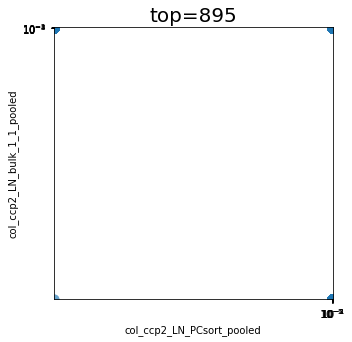

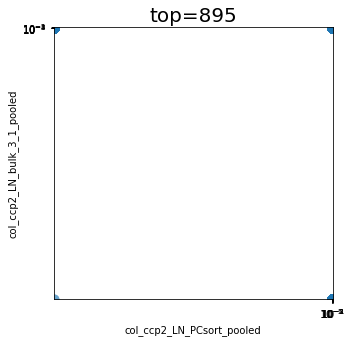

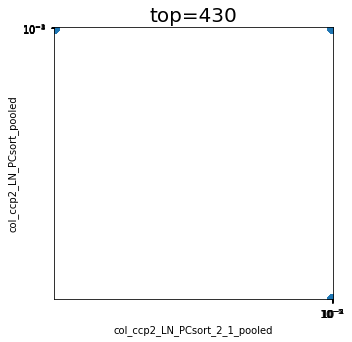

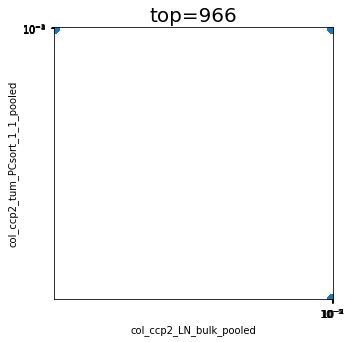

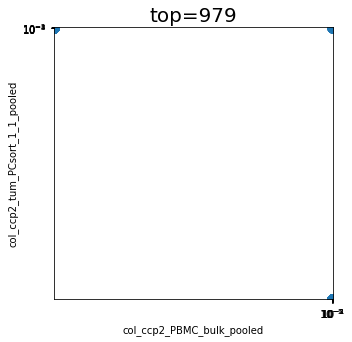

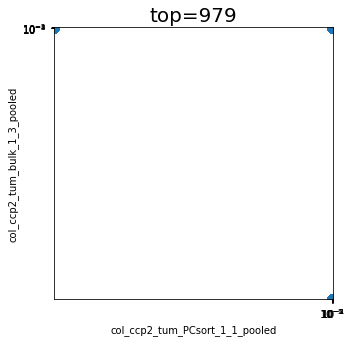

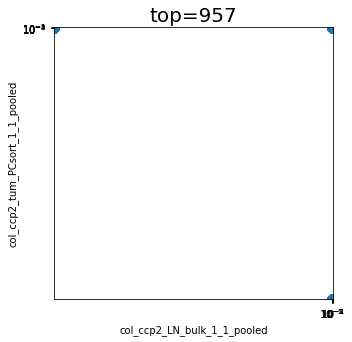

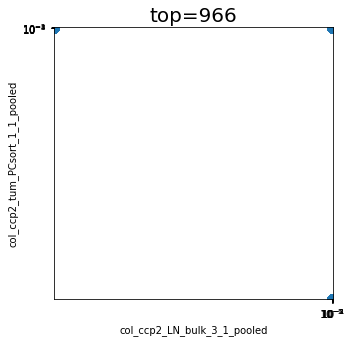

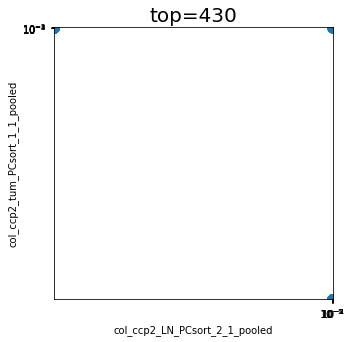

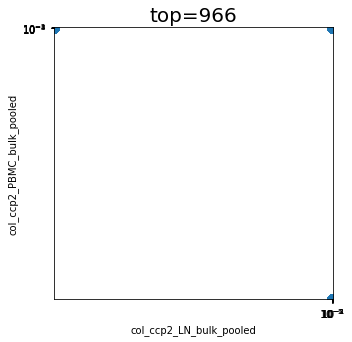

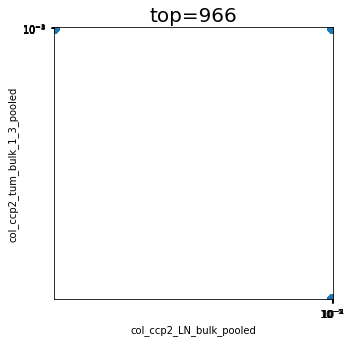

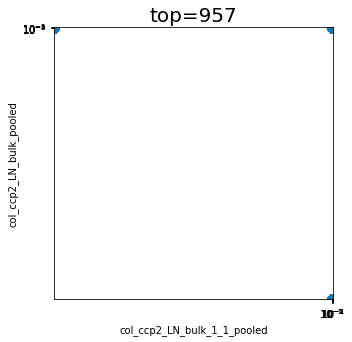

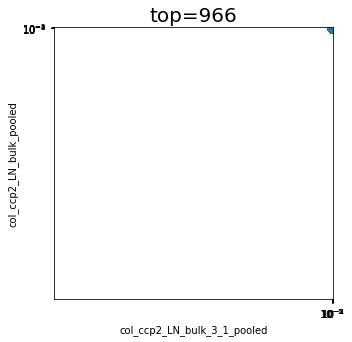

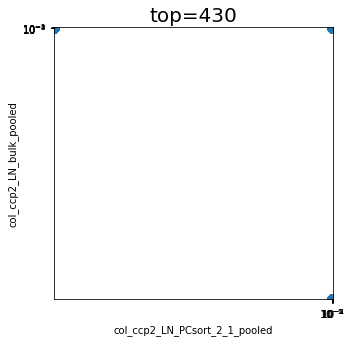

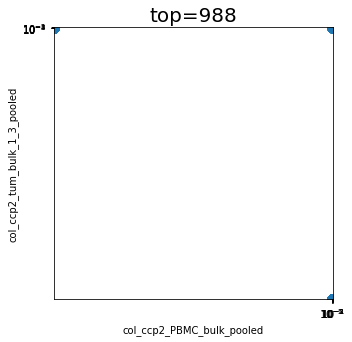

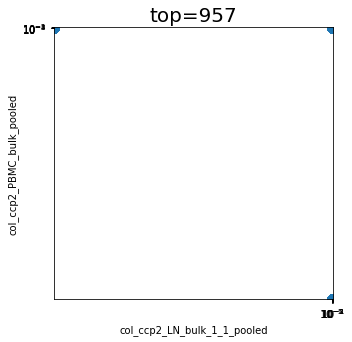

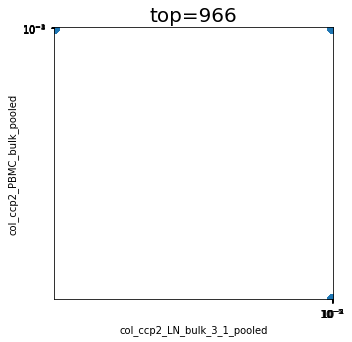

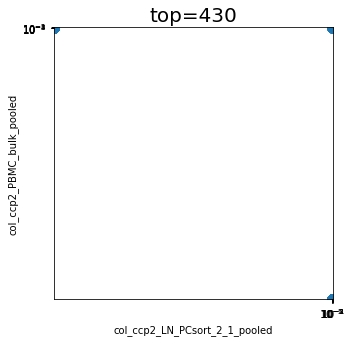

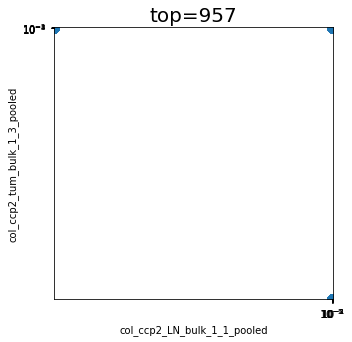

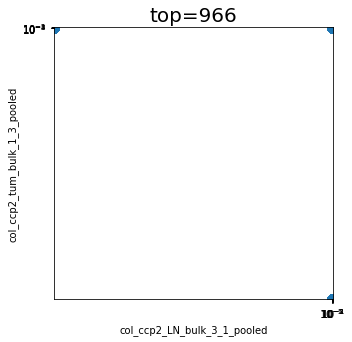

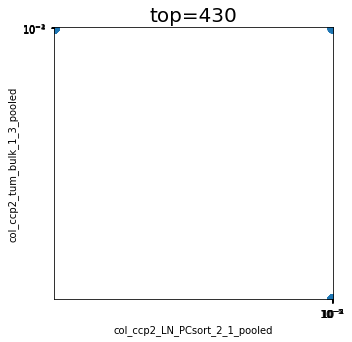

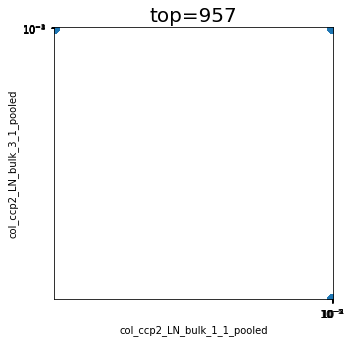

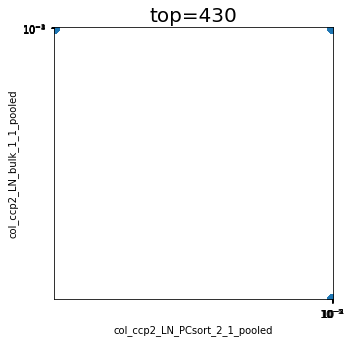

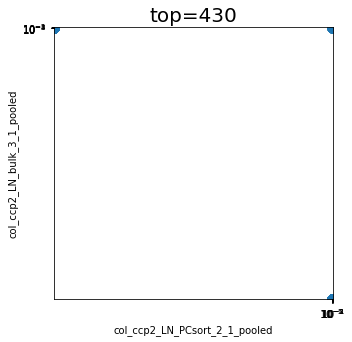

In [12]:
#CREATE ALL POSSIBLE PAIRS OF SAMPLES
pairs=list(itertools.combinations(files, 2))

for p in pairs:
    l=list(p)
    l.sort()
    smp1=l[0]
    smp2=l[1]
    
    df1=data[data['filename']==smp1].copy()
    df2=data[data['filename']==smp2].copy()
    
    topn=min(len(df1),len(df2))
    
    df1=df1.sort_values('cloneFraction',ascending=False)
    df2=df2.sort_values('cloneFraction',ascending=False)
    
    df1=df1.head(topn)
    df2=df2.head(topn)
    
#  IF YOU NEED FREQUENCY RECALCULATION
    df1['cloneFraction']=df1['cloneFraction']/df1['cloneFraction'].sum()
    df2['cloneFraction']=df2['cloneFraction']/df2['cloneFraction'].sum()
    
    
    plt.figure(figsize=(5,5))
    
    plot_data=pd.merge(df1,df2,how='outer',on='nSeqCDR3')
    plot_data=plot_data[['nSeqCDR3','cloneFraction_x','cloneFraction_y']]
    #OTHERWISE WE CANNOT HAVE LOG SCALE
    plot_data= plot_data.apply(lambda x: x.fillna(fmin*0.7))
       
    plt.xlim(fmin/2,fmax)
    plt.ylim(fmin/2,fmax)
    plt.xscale('log')
    plt.yscale('log')
    
    sns.scatterplot(x='cloneFraction_x',y='cloneFraction_y',data=plot_data,s=100,linewidth=0,alpha=0.3)
    
    
    plt.xlabel(smp1.split('.')[0], fontsize=10)
    plt.ylabel(smp2.split('.')[0], fontsize=10)
    plt.title('top='+str(topn), fontsize=20)
    
    plt.show()
    